# 1. Regression

## 1.1. Load Data and Train Model

In [3]:
from sklearn.linear_model import LinearRegression
from holisticai.datasets import load_dataset
from sklearn.metrics import mean_squared_error

dataset = load_dataset('us_crime')
dataset = dataset.train_test_split(test_size=0.2, random_state=42)
train = dataset['test']
test = dataset['test']

model = LinearRegression()
model.fit(train['X'], train['y'])

mean_squared_error(test['y'], model.predict(test['X']))

np.float64(0.013731416251044857)

In [4]:
from holisticai.explainability.metrics import regression_explainability_metrics
from holisticai.utils.feature_importances import compute_surrogate_feature_importance
from holisticai.utils.inspection import compute_partial_dependence
from holisticai.utils import RegressionProxy

proxy = RegressionProxy(predict=model.predict)

importances  = compute_surrogate_feature_importance(proxy=proxy, X=train['X'], importance_type='standard')

ranked_importances = importances.top_alpha(0.8)

partial_dependencies = compute_partial_dependence(train['X'], features=ranked_importances.feature_names, proxy=proxy)

conditional_importances  = compute_surrogate_feature_importance(proxy=proxy, X=train['X'], importance_type='conditional')

y_pred = proxy.predict(train['X'])

regression_explainability_metrics(importances, partial_dependencies, conditional_importances, train['X'], y_pred)

,value,reference
metric,,
Alpha Importance Score,0.009901,0.0
XAI Ease Score,1.000000,1.0
Position Parity,0.250000,1.0
Rank Alignment,0.250000,1.0
Spread Ratio,0.147387,0.0
Spread Divergence,0.060155,0.0
Surrogate Accuracy Score,0.007099,1.0


<Axes: >

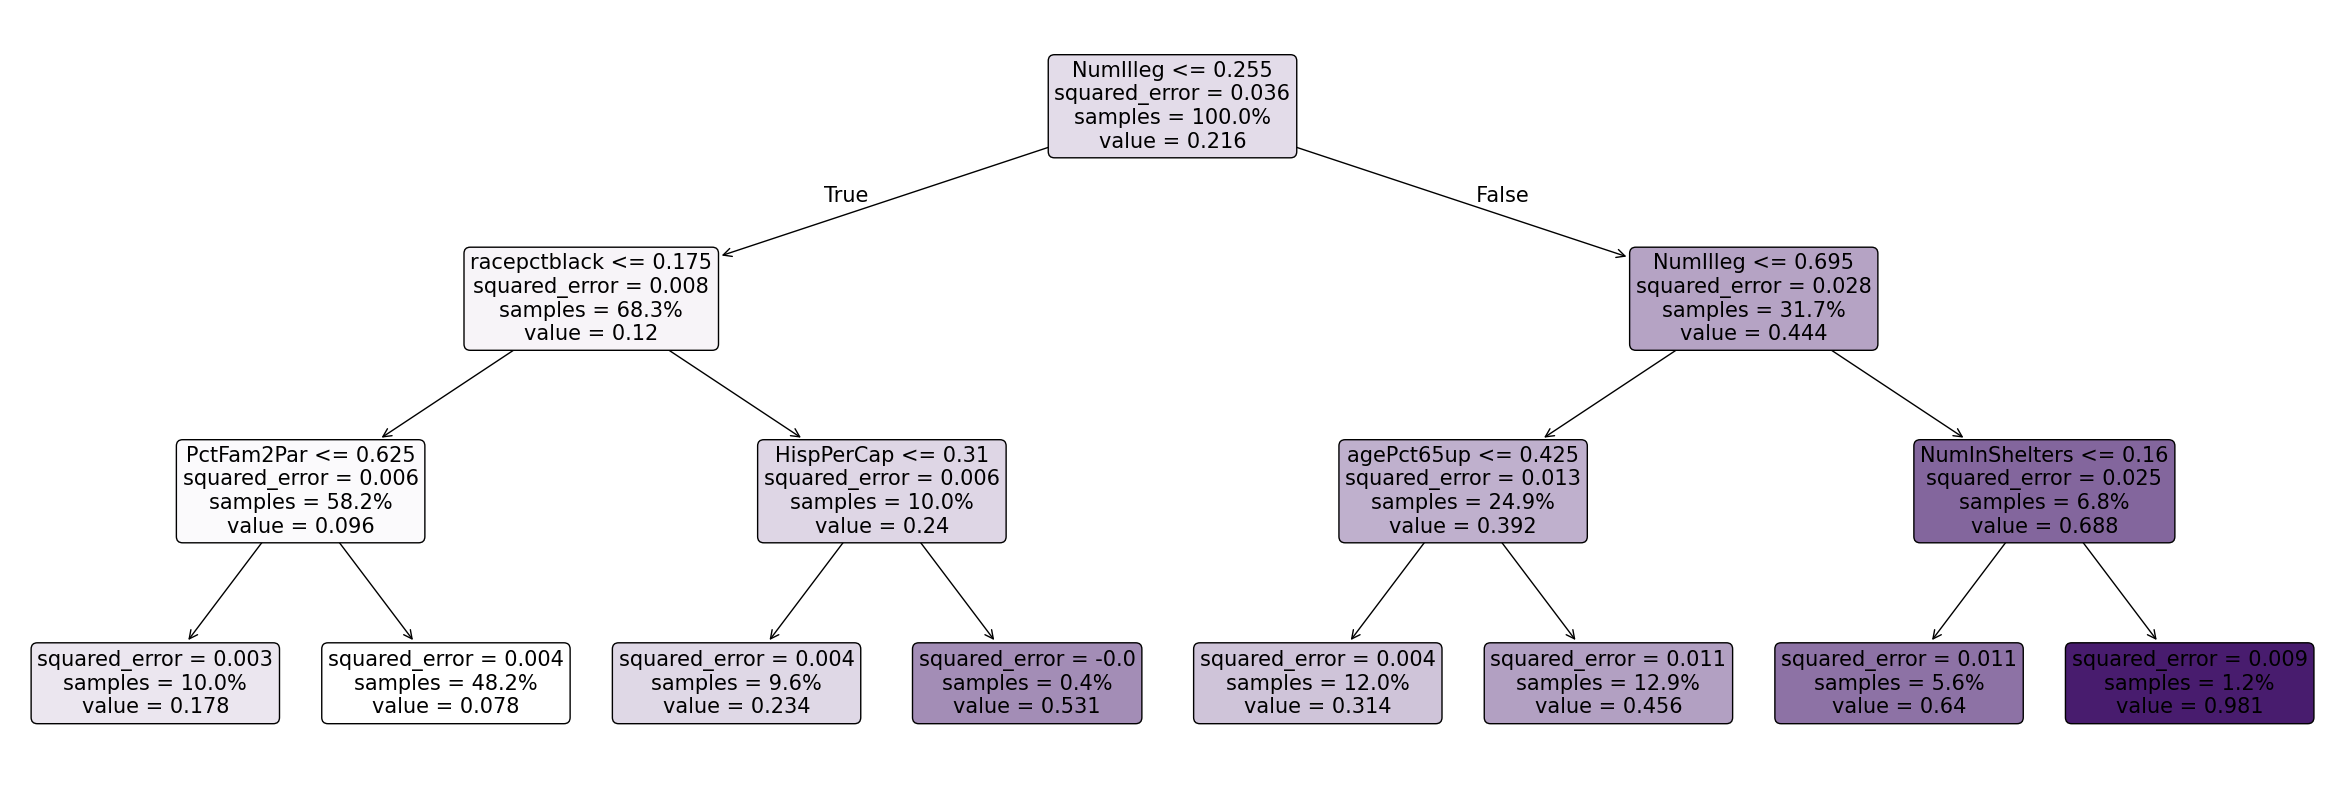

In [5]:
from holisticai.explainability.plots import plot_surrogate

plot_surrogate(importances)

# 3. Classification

In [6]:
from sklearn.linear_model import LogisticRegression
from holisticai.datasets import load_dataset
from sklearn.metrics import accuracy_score

dataset = load_dataset('adult')
dataset = dataset.train_test_split(test_size=0.2, random_state=42)
train = dataset['test']
test = dataset['test']

model = LogisticRegression()
model.fit(train['X'], train['y'])

accuracy_score(test['y'], model.predict(test['X']))

0.7957987838584853

In [7]:
from holisticai.explainability.metrics import classification_explainability_metrics
from holisticai.utils import BinaryClassificationProxy
from holisticai.utils.feature_importances import compute_surrogate_feature_importance
from holisticai.utils.inspection import compute_partial_dependence

proxy = BinaryClassificationProxy(predict=model.predict, predict_proba=model.predict_proba, classes=model.classes_)

importances  = compute_surrogate_feature_importance(X=train['X'], proxy=proxy,  importance_type='standard')

ranked_importances = importances.top_alpha(0.8)

partial_dependencies = compute_partial_dependence(train['X'], features=ranked_importances.feature_names, proxy=proxy)

conditional_importances  = compute_surrogate_feature_importance(X=train['X'], proxy=proxy,  importance_type='conditional')

y_pred = proxy.predict(train['X'])

classification_explainability_metrics(importances, partial_dependencies, conditional_importances, train['X'], y_pred)

,value,reference
metric,,
Alpha Importance Score,0.020619,0.0
XAI Ease Score,0.750000,1.0
Position Parity,0.000000,1.0
Rank Alignment,0.000000,1.0
Spread Ratio,0.135284,0.0
Spread Divergence,0.043963,0.0
Surrogate Accuracy Score,0.980873,1.0


<Axes: >

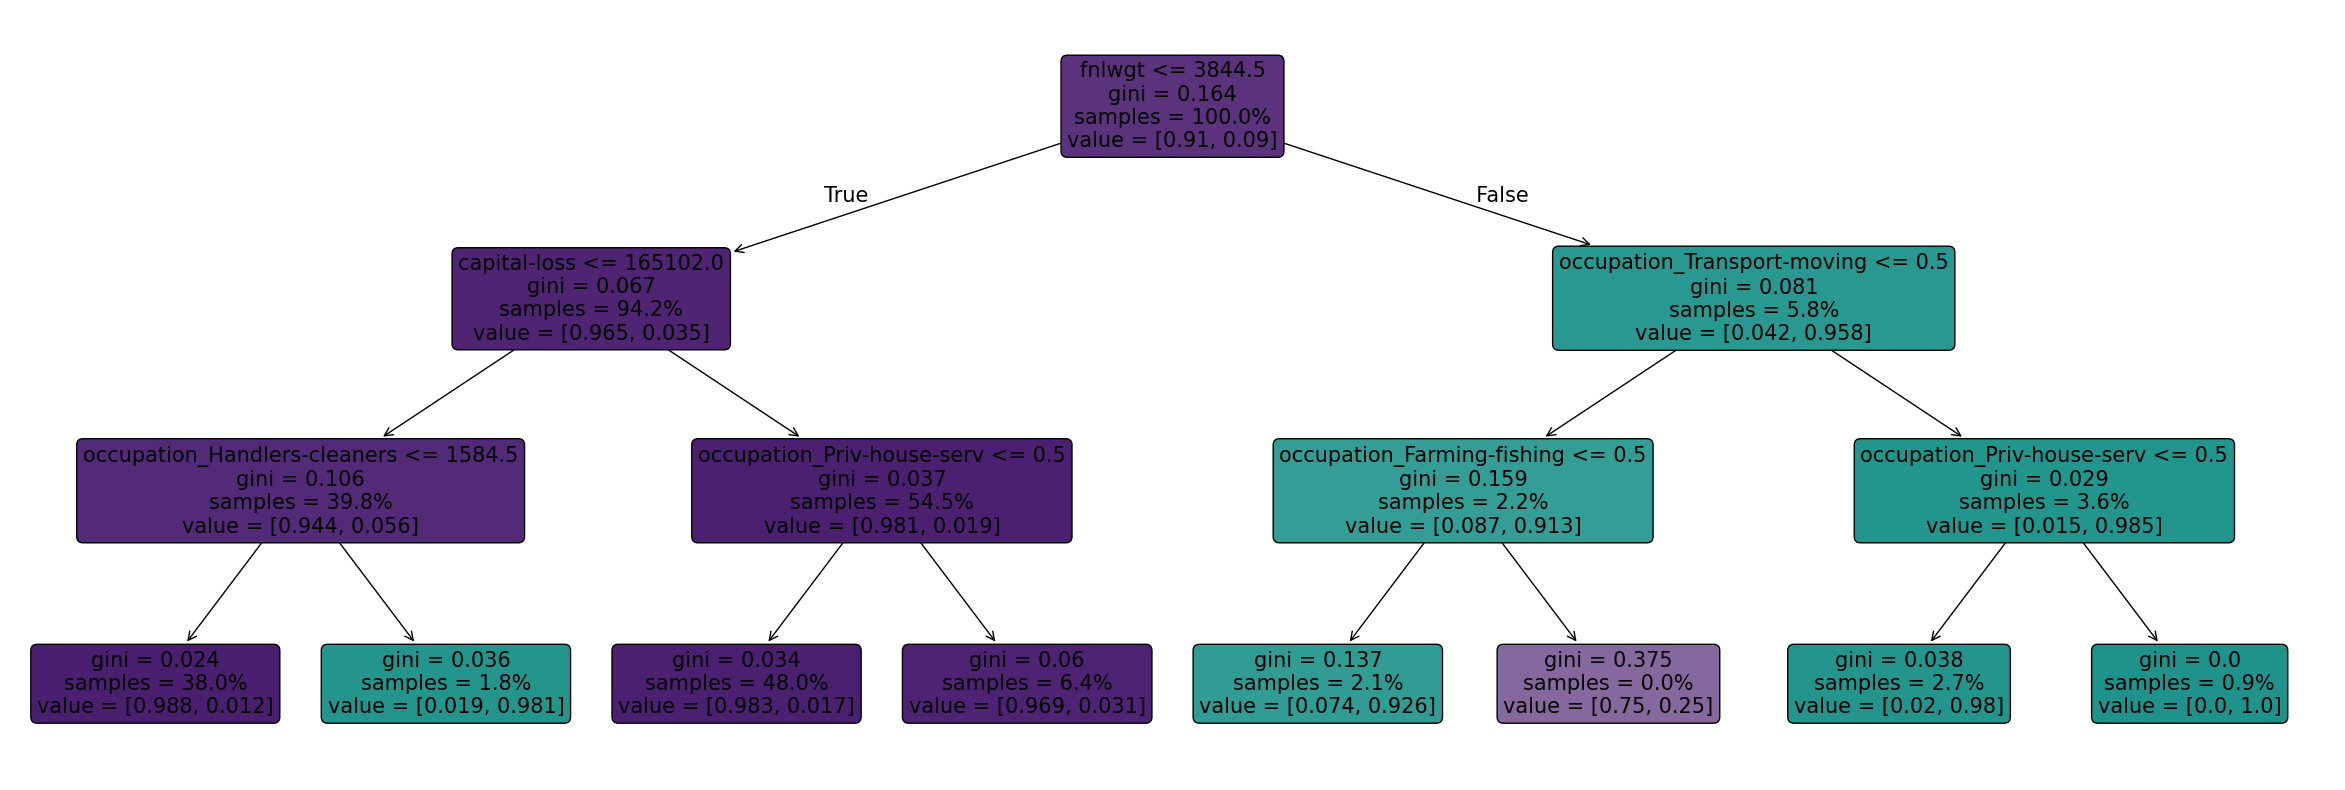

In [8]:
from holisticai.explainability.plots import plot_surrogate

plot_surrogate(importances)

# Multi Classification

In [9]:
from sklearn.linear_model import LogisticRegression
from holisticai.datasets import load_dataset
from sklearn.metrics import accuracy_score

dataset = load_dataset(dataset_name="student_multiclass")
dataset = dataset.train_test_split(test_size=0.2, random_state=42)
train = dataset['test']
test = dataset['test']

model = LogisticRegression()
model.fit(train['X'], train['y'])

accuracy_score(test['y'], model.predict(test['X']))

0.810126582278481

In [10]:
from holisticai.explainability.metrics import multiclass_explainability_metrics
from holisticai.utils import MultiClassificationProxy
from holisticai.utils.feature_importances import compute_surrogate_feature_importance
from holisticai.utils.inspection import compute_partial_dependence

proxy = MultiClassificationProxy(predict=model.predict, predict_proba=model.predict_proba, classes=model.classes_)

importances  = compute_surrogate_feature_importance(X=train['X'], y=train['y'], proxy=proxy, importance_type='standard')

ranked_importances = importances.top_alpha(0.8)

partial_dependencies = compute_partial_dependence(train['X'], features=ranked_importances.feature_names, proxy=proxy)

conditional_importances  = compute_surrogate_feature_importance(X=train['X'], y=train['y'], proxy=proxy, importance_type='conditional')

y_pred = proxy.predict(train['X'])

multiclass_explainability_metrics(importances, partial_dependencies, conditional_importances, train['X'], y_pred)

,value,reference
metric,,
Alpha Importance Score,0.115385,0.0
XAI Ease Score,0.888889,1.0
Position Parity,0.000000,1.0
Rank Alignment,0.074074,1.0
Spread Ratio,0.437464,0.0
Spread Divergence,0.195874,0.0
Surrogate Accuracy Score,0.848101,1.0


<Axes: >

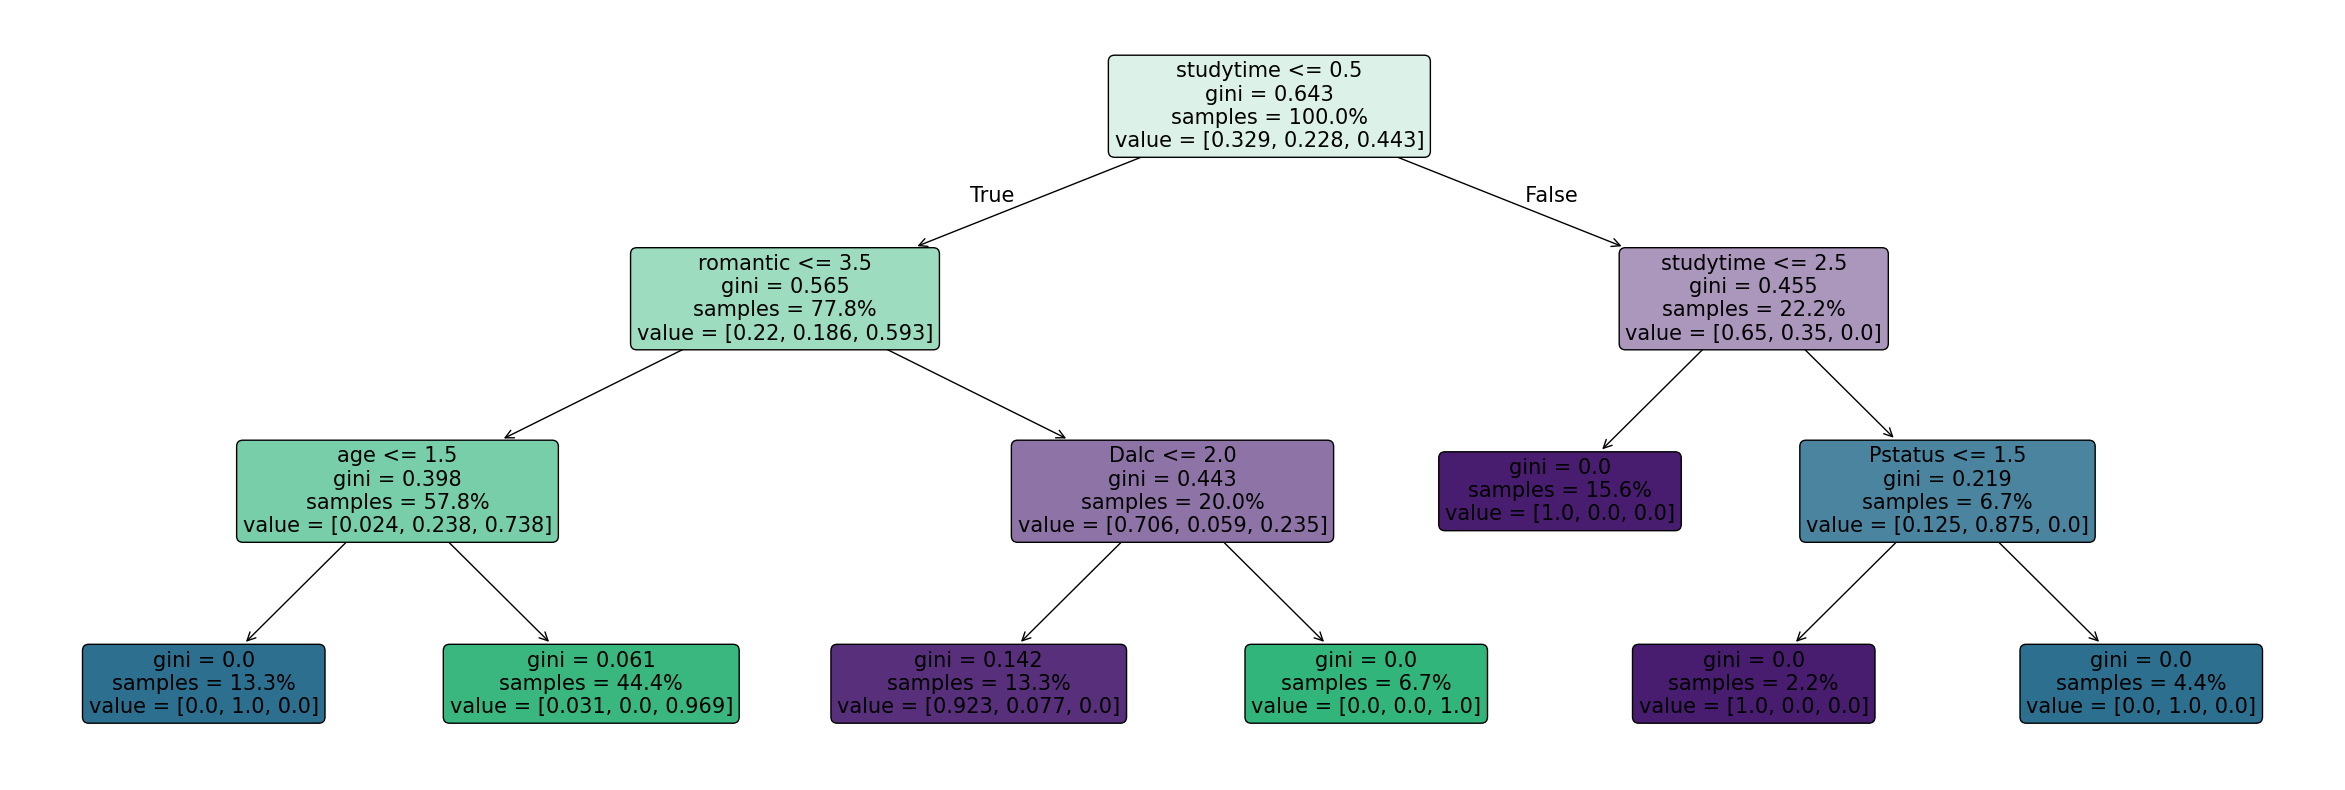

In [11]:
from holisticai.explainability.plots import plot_surrogate

plot_surrogate(importances)